### Multiple Linear Regression
# Prediction of Car Prices

## Step 1: Reading and Understanding the Data

In [244]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [245]:
import numpy as np
import pandas as pd

In [246]:
carPrice_df = pd.read_csv("CarPrice_Assignment.csv")

In [247]:
# Check the head of the dataset
carPrice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [248]:
carPrice_df.shape

(205, 26)

In [249]:
carPrice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [250]:
carPrice_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Understanding the Data

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns
carPrice_df.drop(['car_ID'], axis = 1, inplace = True)

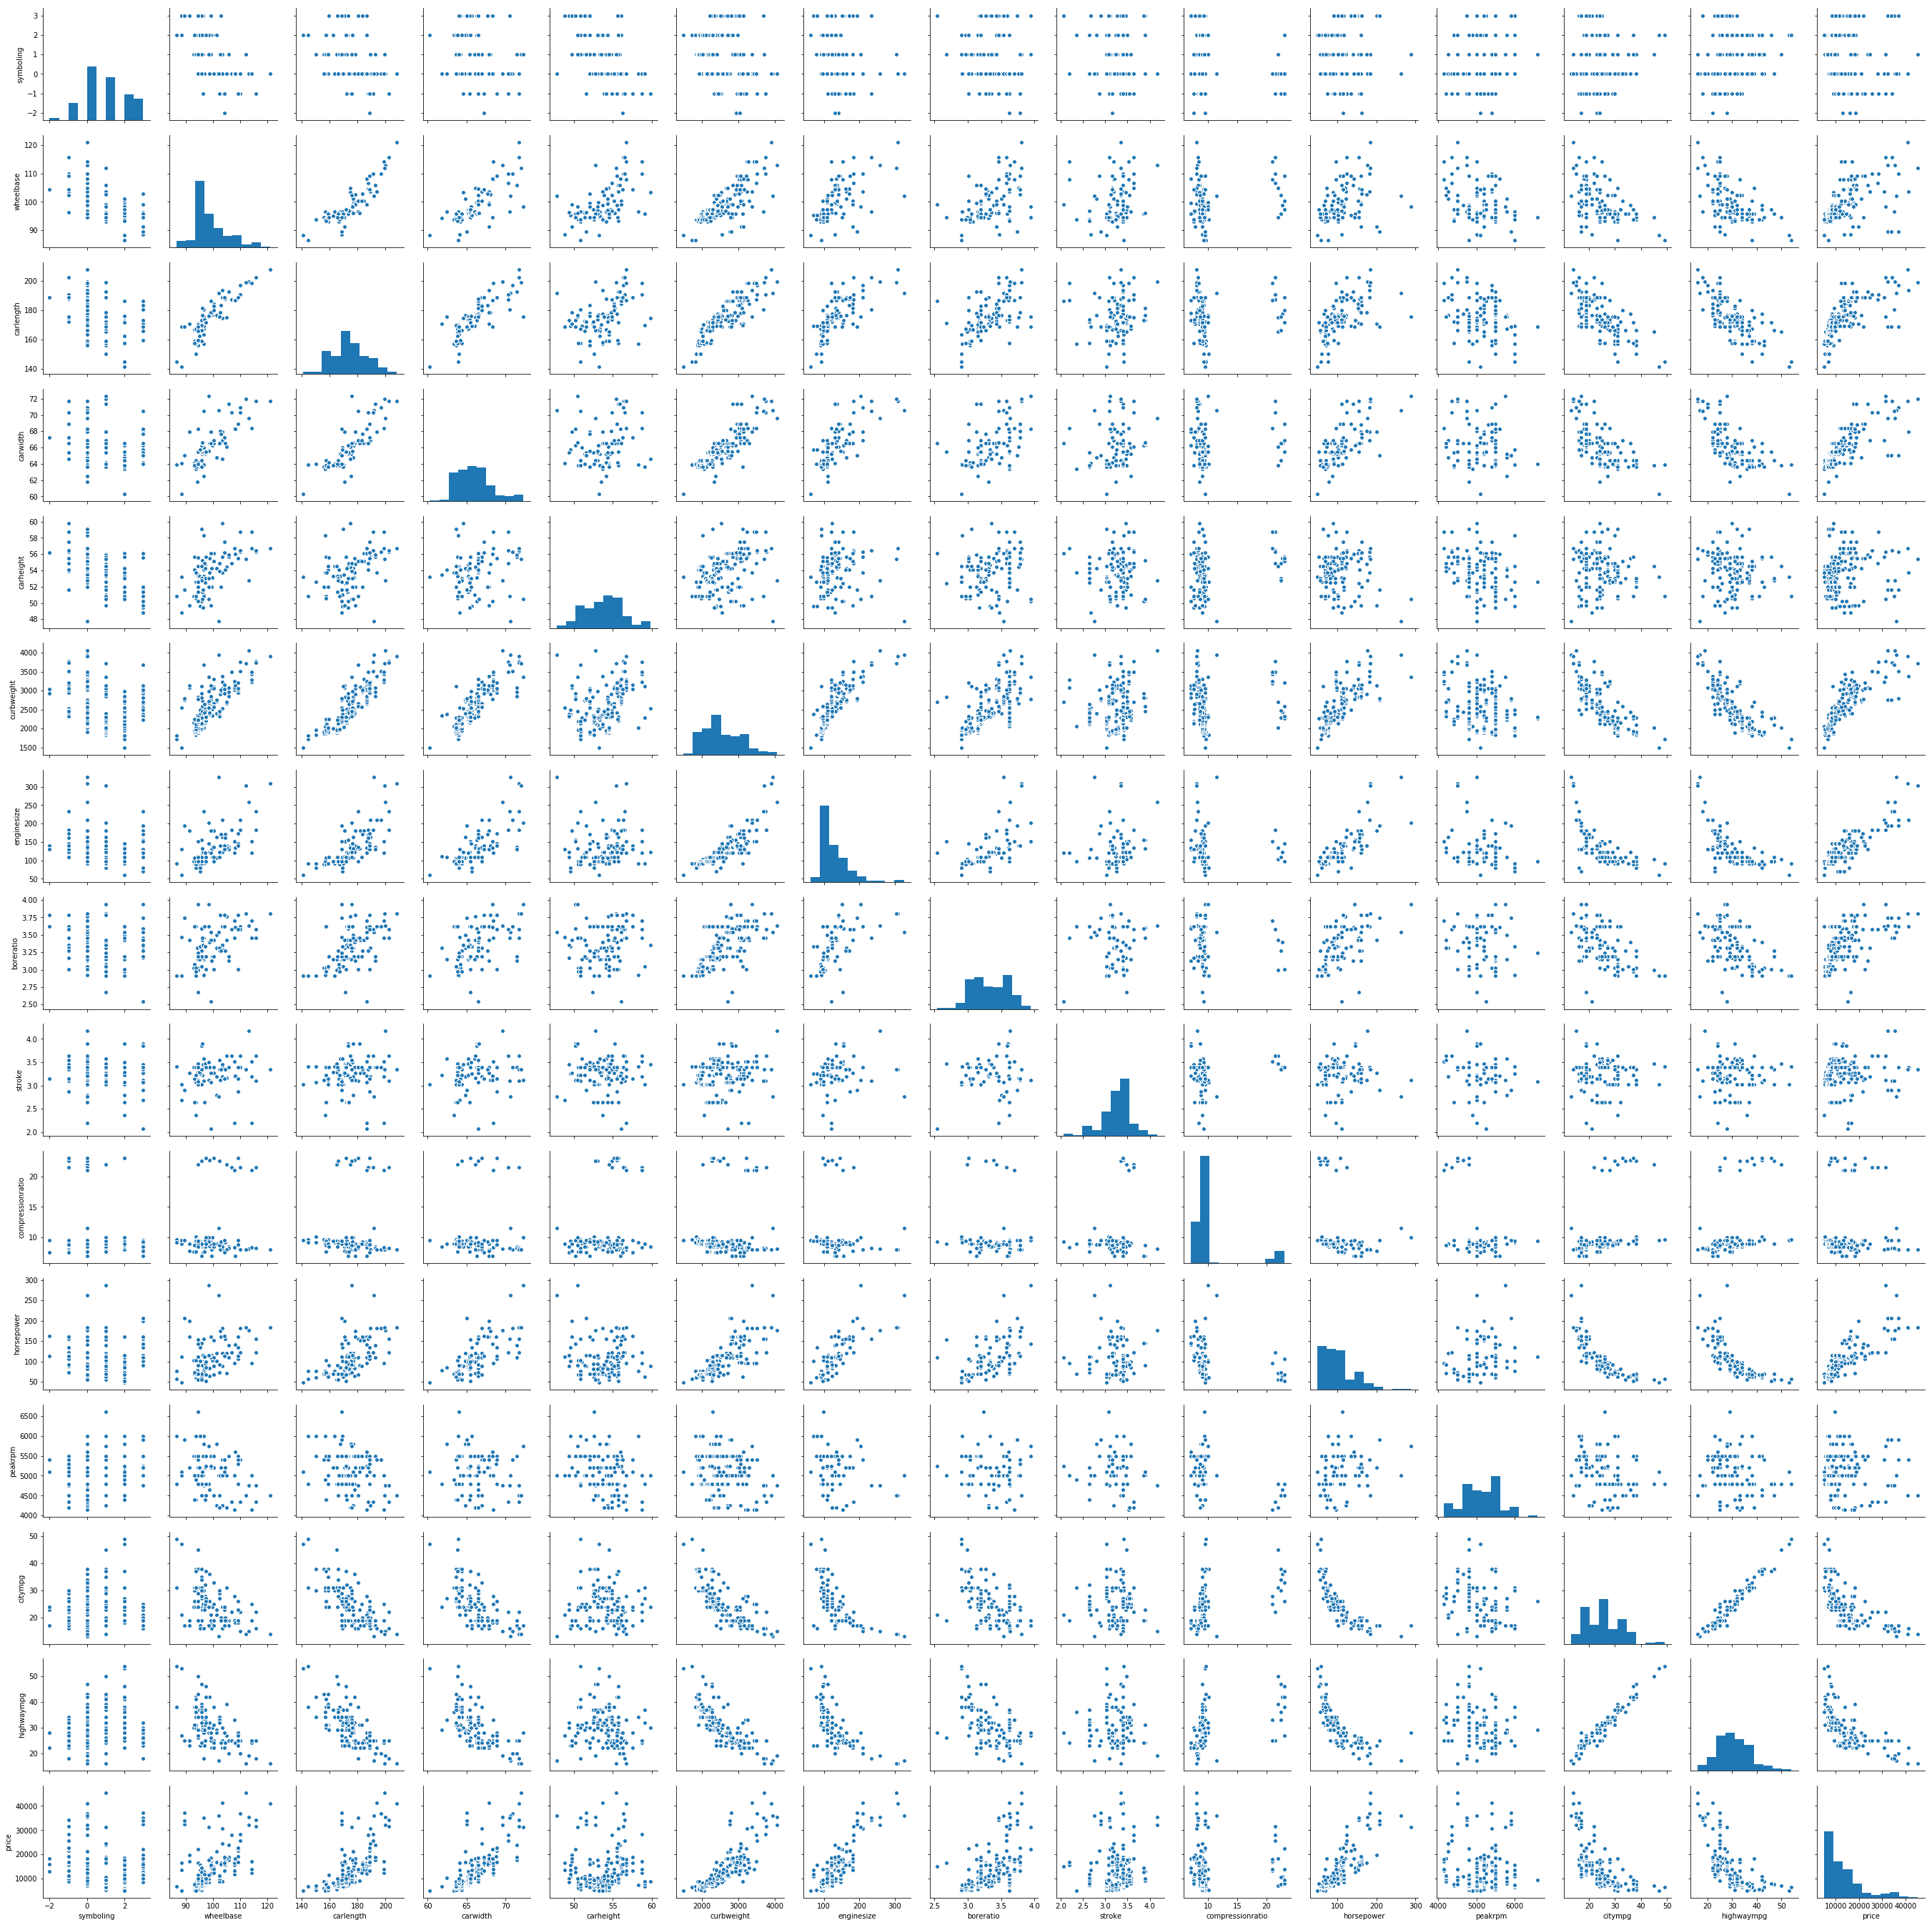

In [252]:
#Pairplot of all the numeric variables
sns.pairplot(carPrice_df)
plt.show()

In [253]:
#Dropping the columns which doesnt show any trend with the Dependent variable,'price'
carPrice_df.drop(['carheight','stroke','compressionratio','peakrpm'], axis = 1, inplace = True)

In [254]:
#Splitting the CarName column values into a single value i.e. extracting only the car_Company
car_Company=list(carPrice_df['CarName'])
result=[str(x).split(" ")[0] for x in car_Company]

In [255]:
#Adding the car_Company column and replacing wrong CarCompany name spellings with correct ones in carPrice_df dataframe
carPrice_df['car_Company']=pd.Series(result)
carPrice_df["car_Company"]=carPrice_df["car_Company"].replace("maxda","mazda")
carPrice_df["car_Company"]=carPrice_df["car_Company"].replace("porcshce","porsche")
carPrice_df["car_Company"]=carPrice_df["car_Company"].replace("toyouta","toyota")
carPrice_df["car_Company"]=carPrice_df["car_Company"].replace("vokswagen","volkswagen")
carPrice_df["car_Company"]=carPrice_df["car_Company"].replace("Nissan","nissan")
#carPrice_df.to_excel(r'C:\Users\awx5324225\Documents\Upgrad_AI_ML\Assignment2\CarPrice_Updated1.xlsx', index = False)

In [256]:
carPrice_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,car_Company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,dohc,four,130,mpfi,3.47,111,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,dohc,four,130,mpfi,3.47,111,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,ohc,four,109,mpfi,3.19,102,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,ohc,five,136,mpfi,3.19,115,18,22,17450.0,audi


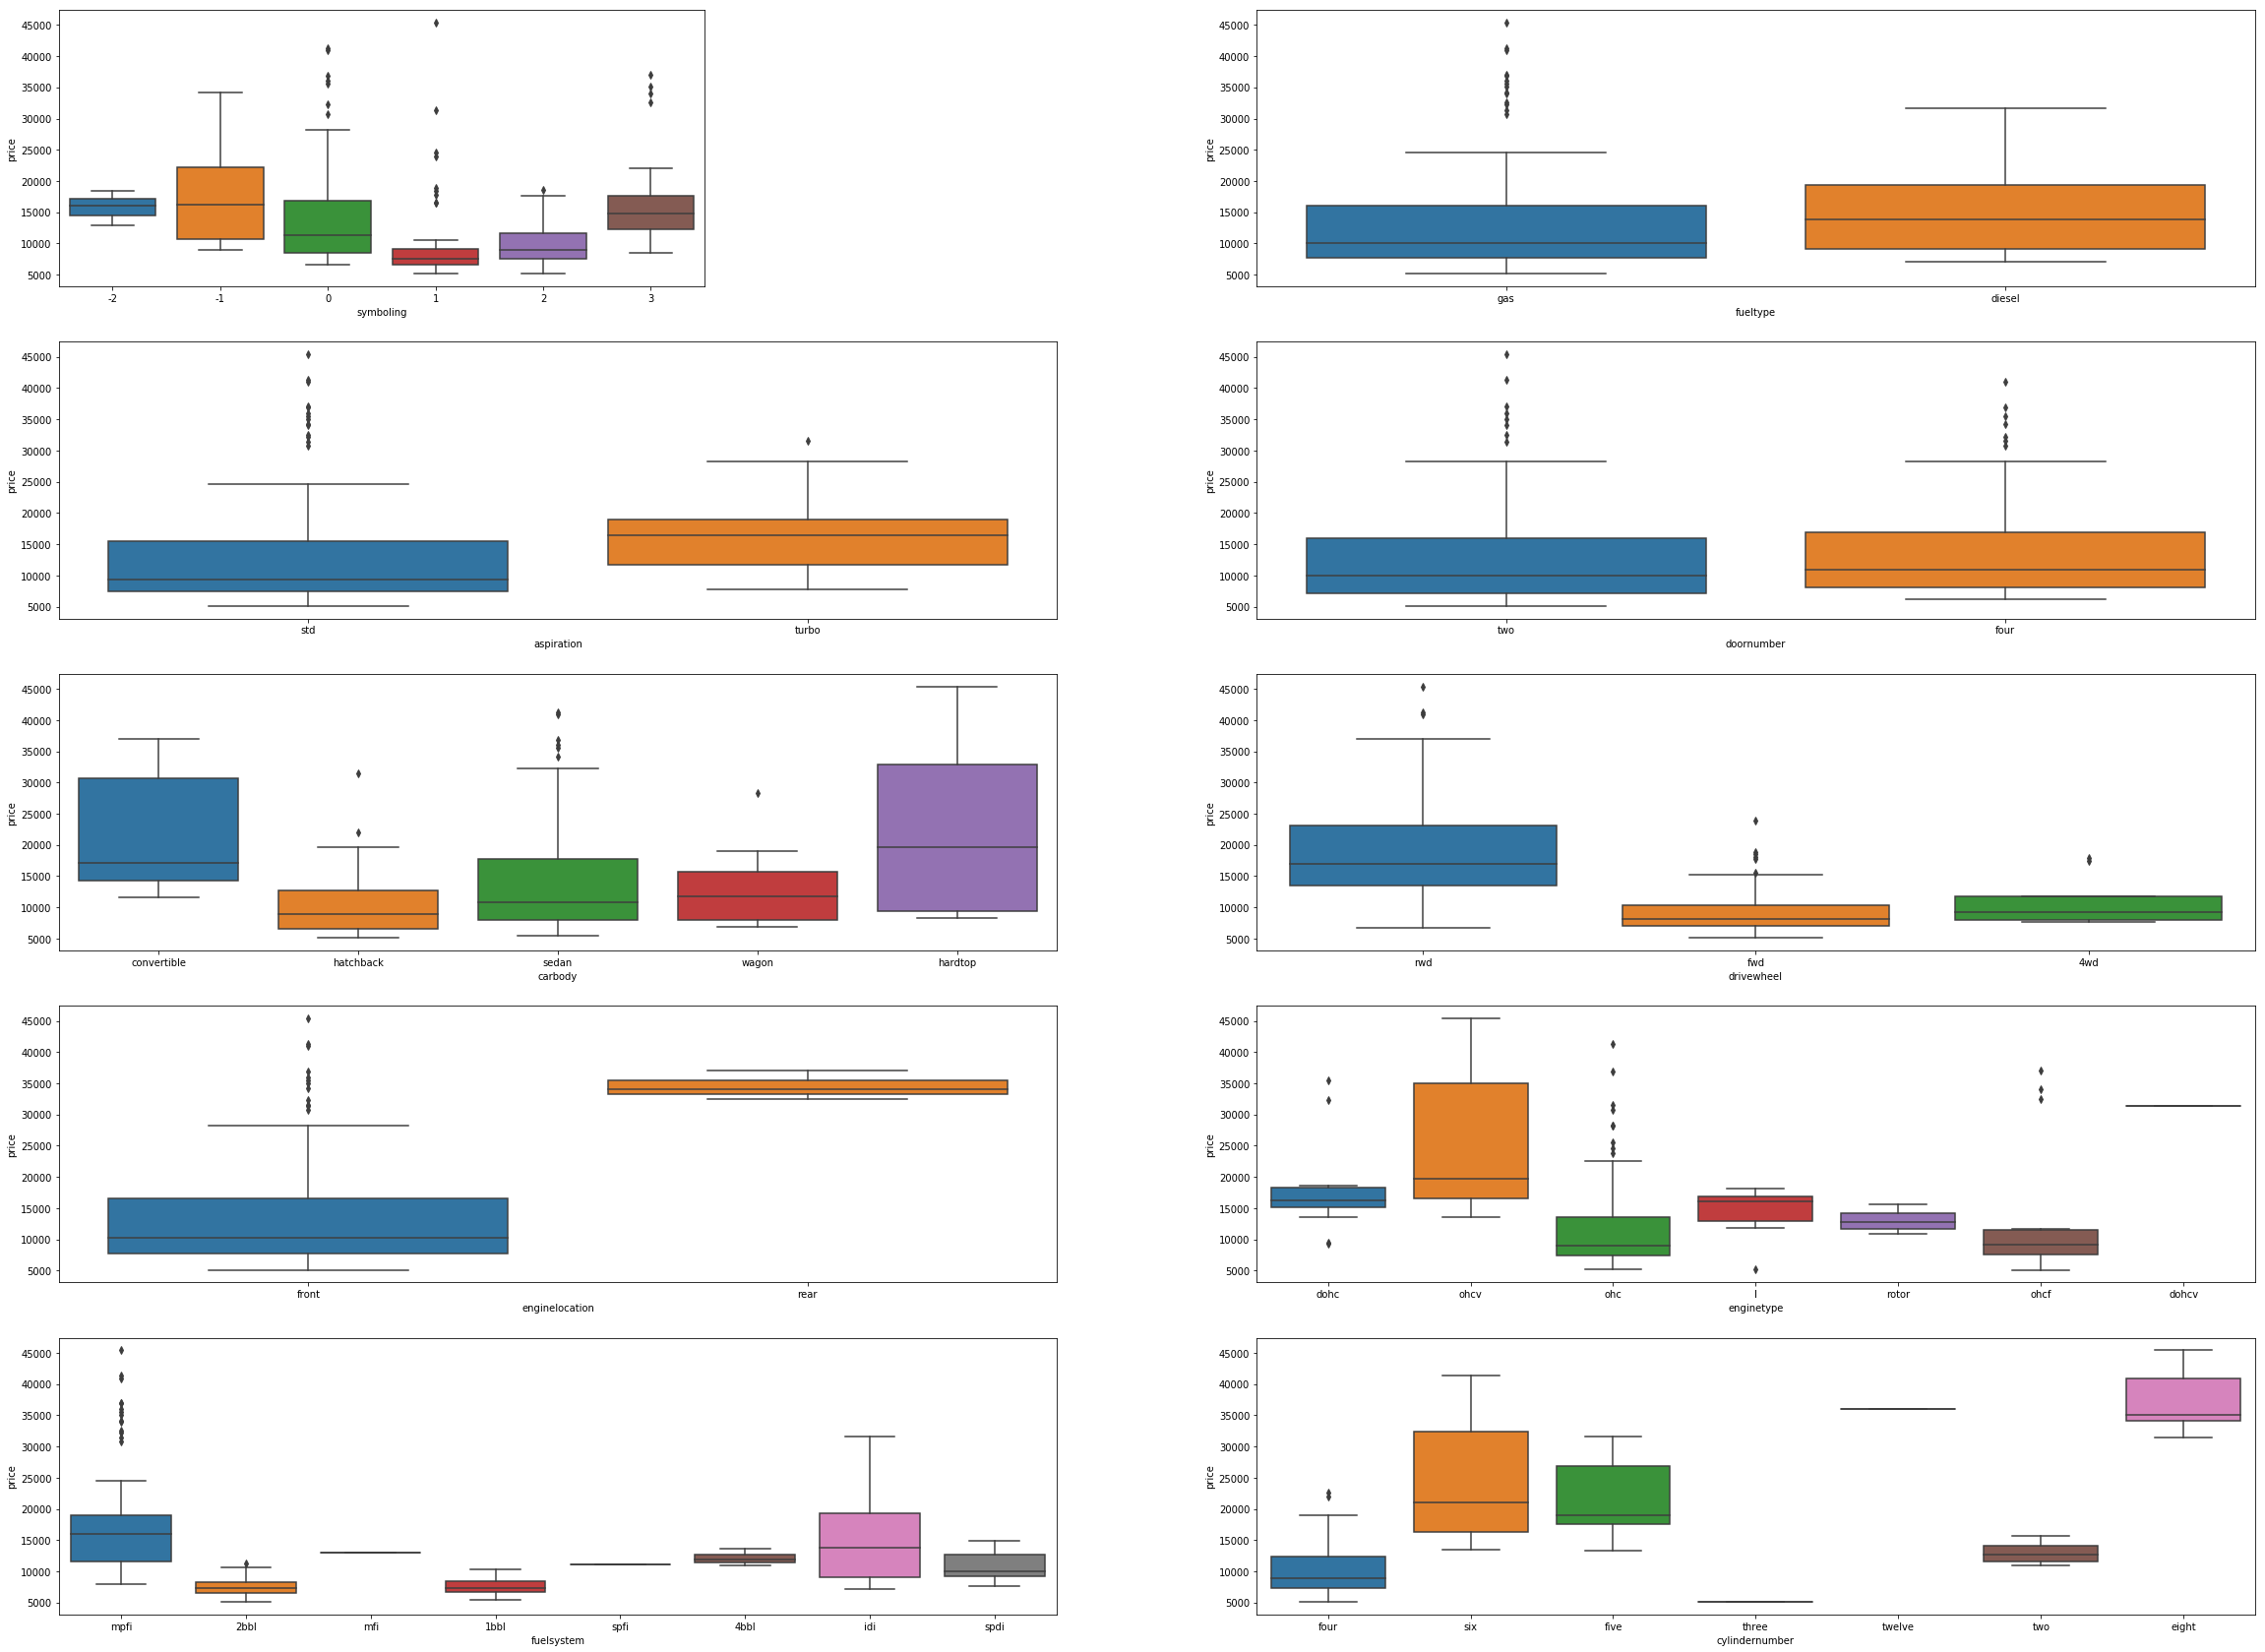

In [257]:
#Boxplot for all the Categorical variables.
plt.figure(figsize=(40,30))
plt.subplot(5,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = carPrice_df)
plt.subplot(5,2,2)
sns.boxplot(x = 'fueltype', y = 'price', data = carPrice_df)
plt.subplot(5,2,3)
sns.boxplot(x = 'aspiration', y = 'price', data = carPrice_df)
plt.subplot(5,2,4)
sns.boxplot(x = 'doornumber', y = 'price', data = carPrice_df)
plt.subplot(5,2,5)
sns.boxplot(x = 'carbody', y = 'price', data = carPrice_df)
plt.subplot(5,2,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = carPrice_df)
plt.subplot(5,2,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = carPrice_df)
plt.subplot(5,2,8)
sns.boxplot(x = 'enginetype', y = 'price', data = carPrice_df)
plt.subplot(5,2,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carPrice_df)
plt.subplot(5,2,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carPrice_df)
plt.show()

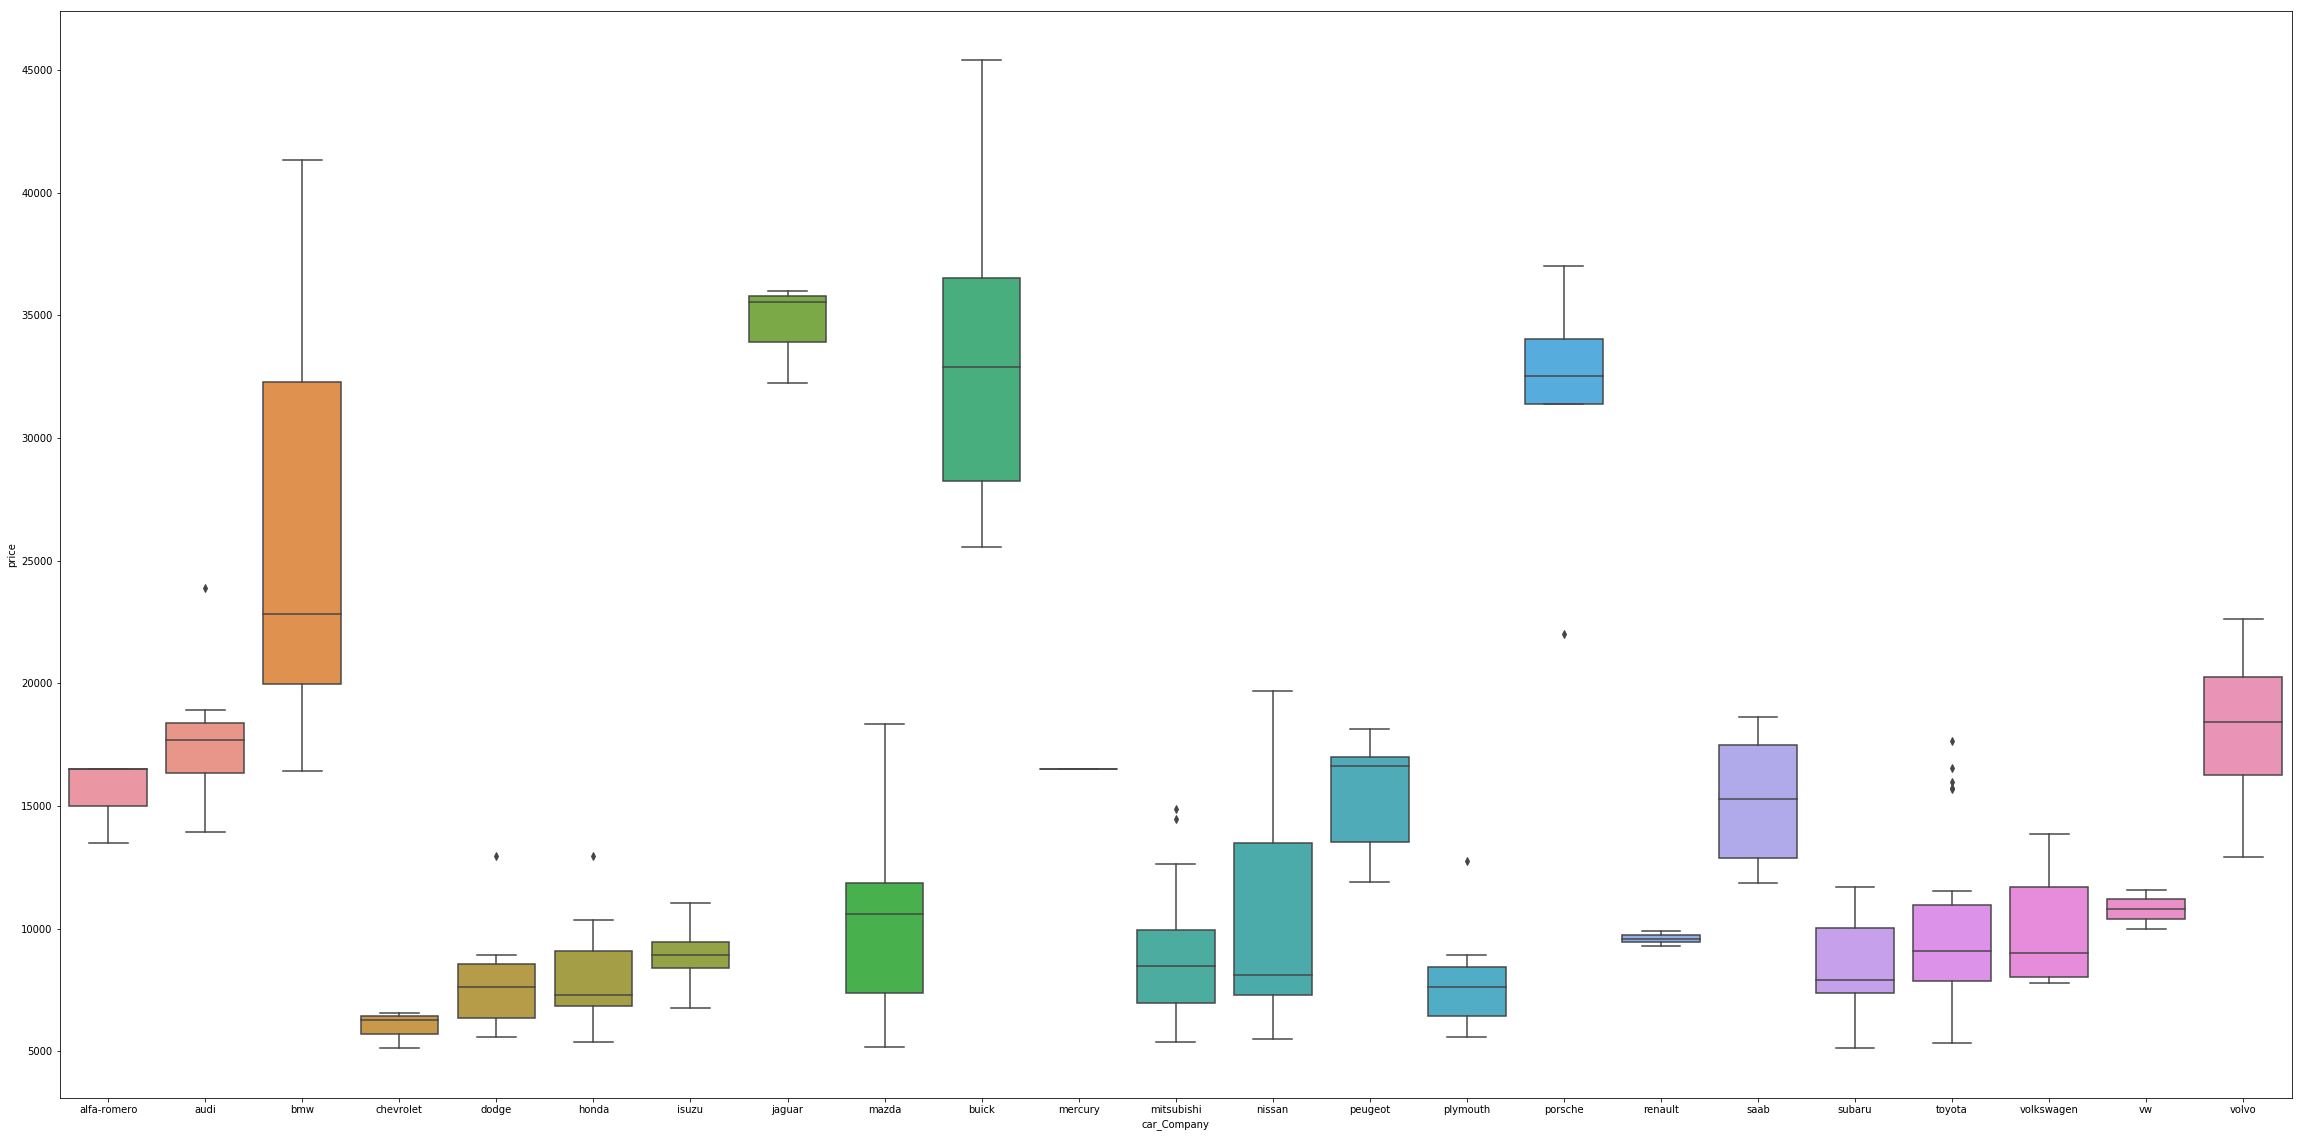

In [258]:
#As a lot of car companies are present, it's boxplot is done differently
plt.figure(figsize=(40,20))
sns.boxplot(x = 'car_Company', y = 'price', data = carPrice_df)
plt.show()

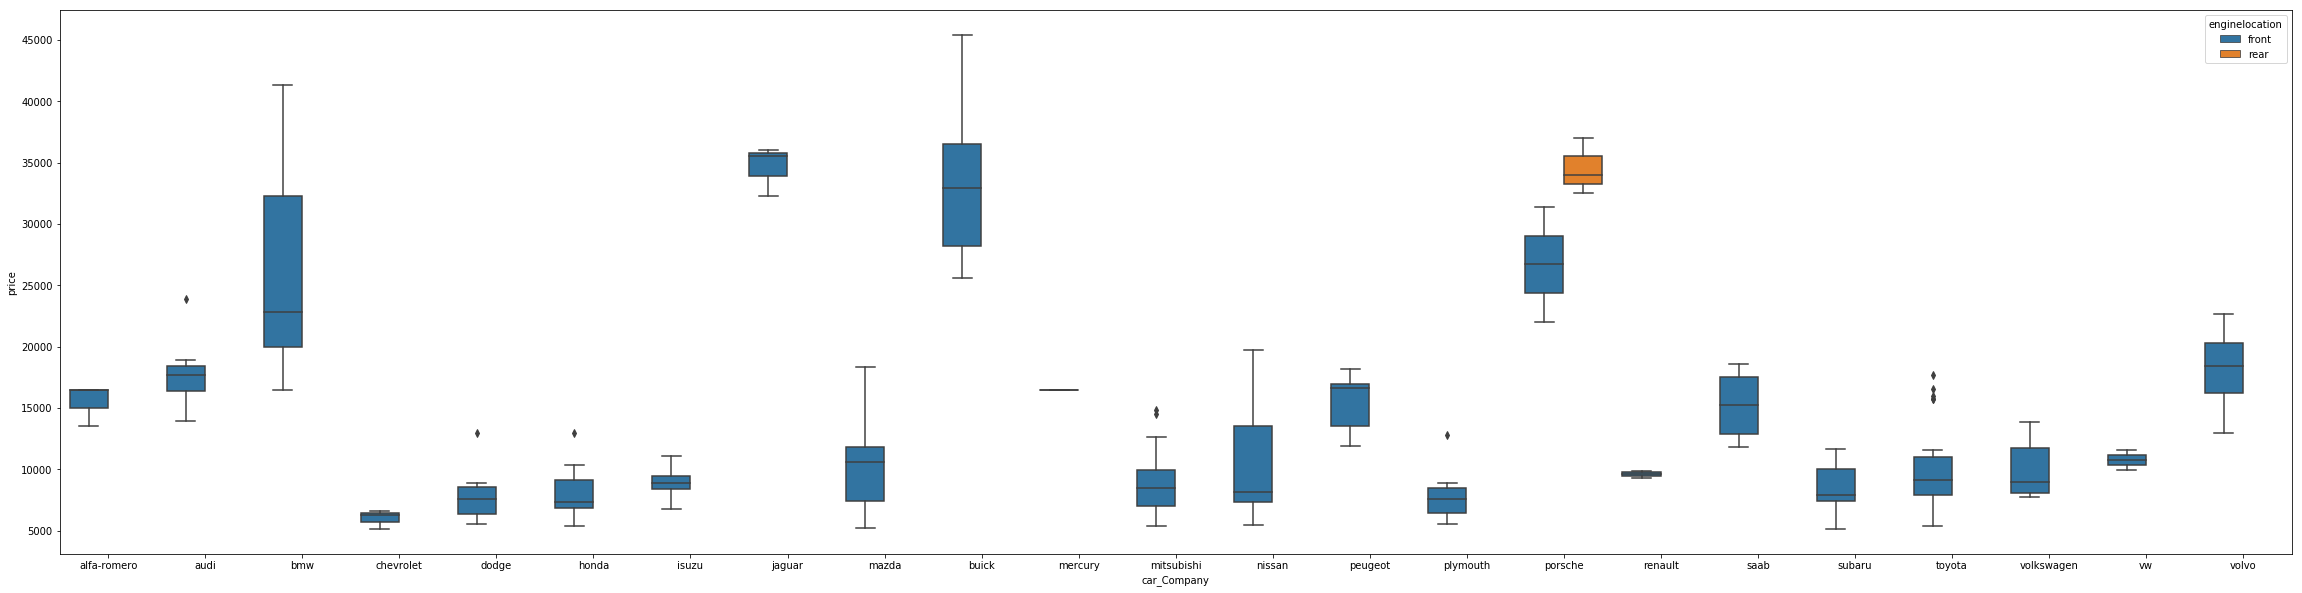

In [259]:
#Visualization of one of these categorical features parallely by using the hue argument.
#Below is the plot for car_Company with enginelocation as the hue
plt.figure(figsize = (40,10))
sns.boxplot(x = 'car_Company', y = 'price', hue = 'enginelocation', data = carPrice_df)
plt.show()

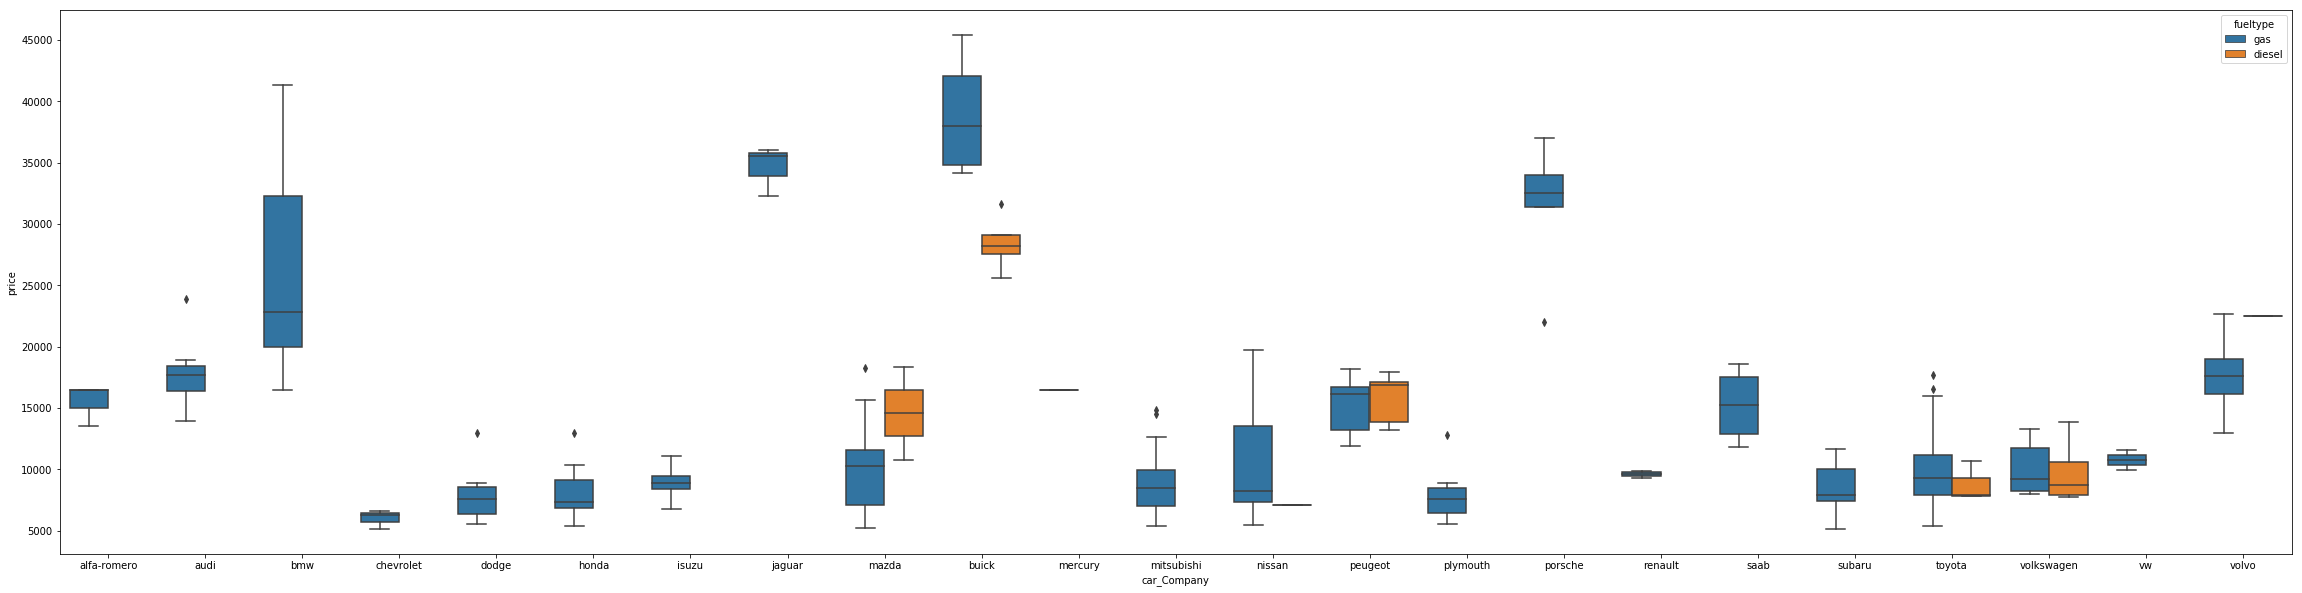

In [260]:
#Visualization of one of these categorical features parallely by using the hue argument.
#Below is the plot for car_Company with fueltype as the hue
plt.figure(figsize = (40,10))
sns.boxplot(x = 'car_Company', y = 'price', hue = 'fueltype', data = carPrice_df)
plt.show()

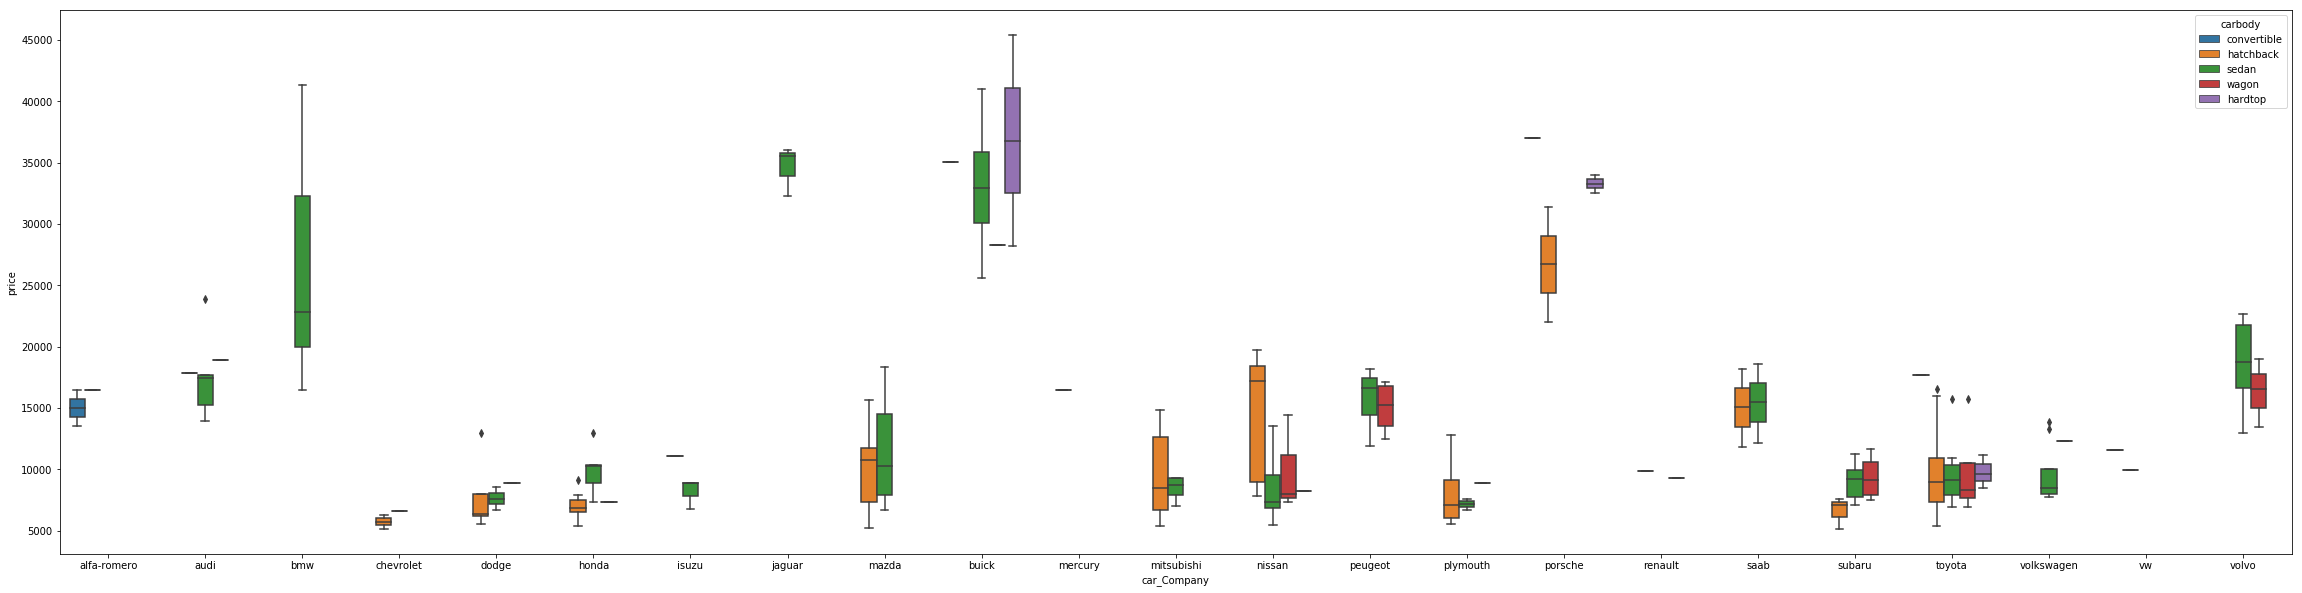

In [261]:
#Visualization of one of these categorical features parallely by using the hue argument.
#Below is the plot for car_Company with carbody as the hue
plt.figure(figsize = (40,10))
sns.boxplot(x = 'car_Company', y = 'price', hue = 'carbody', data = carPrice_df)
plt.show()

## Step 3: Data Preparation

- In order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s as per requirement.

In [262]:
#For column fueltype,aspiration,doornumber,enginelocation
varlist =  ['fueltype', 'aspiration', 'doornumber', 'enginelocation']

# Defining the map function
def binary_map(x):
    return x.map({'gas': 1, "diesel": 0, "std": 0,'turbo': 1, "four": 0,'two': 1, "front": 1, 'rear': 0})

# Applying the function to the carPrice_df list
carPrice_df[varlist] = carPrice_df[varlist].apply(binary_map)

In [263]:
# Check the carPrice_df dataframe

carPrice_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,car_Company
0,3,alfa-romero giulia,1,0,1,convertible,rwd,1,88.6,168.8,...,dohc,four,130,mpfi,3.47,111,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,1,0,1,convertible,rwd,1,88.6,168.8,...,dohc,four,130,mpfi,3.47,111,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,1,0,1,hatchback,rwd,1,94.5,171.2,...,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,alfa-romero
3,2,audi 100 ls,1,0,0,sedan,fwd,1,99.8,176.6,...,ohc,four,109,mpfi,3.19,102,24,30,13950.0,audi
4,2,audi 100ls,1,0,0,sedan,4wd,1,99.4,176.6,...,ohc,five,136,mpfi,3.19,115,18,22,17450.0,audi


## Dummy Variables

- The variable `car_Company`,`carbody`,`drivewheel`,`enginetype`,`cylindernumber`,`fuelsystem` has `23 levels`,`5 levels`,     `3 levels`,`7 levels`,`7 levels`,`8 levels` respectively. Need to convert these levels into integer as well. 

In [264]:
# Getting the dummy variables for the above mentioned features and storing it in a new variable - 'status'
status = pd.get_dummies(carPrice_df[['car_Company','carbody','drivewheel','enginetype','cylindernumber','fuelsystem']])

In [265]:
# Checking, what the dataset 'status' looks like
status.head()

,car_Company_alfa-romero,car_Company_audi,car_Company_bmw,car_Company_buick,car_Company_chevrolet,car_Company_dodge,car_Company_honda,car_Company_isuzu,car_Company_jaguar,car_Company_mazda,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [266]:
# Let's drop the first column from status df for each of the 6 columns using 'drop_first = True'
# Add the results to the original housing dataframe
status = pd.get_dummies(carPrice_df['car_Company'], drop_first = True)
carPrice_df = pd.concat([carPrice_df, status], axis = 1)
status = pd.get_dummies(carPrice_df['carbody'], drop_first = True)
carPrice_df = pd.concat([carPrice_df, status], axis = 1)
status = pd.get_dummies(carPrice_df['drivewheel'], drop_first = True)
carPrice_df = pd.concat([carPrice_df, status], axis = 1)
status = pd.get_dummies(carPrice_df['enginetype'], drop_first = True)
carPrice_df = pd.concat([carPrice_df, status], axis = 1)
status = pd.get_dummies(carPrice_df['cylindernumber'], drop_first = True)
carPrice_df = pd.concat([carPrice_df, status], axis = 1)
status = pd.get_dummies(carPrice_df['fuelsystem'], drop_first = True)
carPrice_df = pd.concat([carPrice_df, status], axis = 1)

In [267]:
# Now let's see the head of our dataframe.

carPrice_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,alfa-romero giulia,1,0,1,convertible,rwd,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,3,alfa-romero stelvio,1,0,1,convertible,rwd,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,1,alfa-romero Quadrifoglio,1,0,1,hatchback,rwd,1,94.5,171.2,...,0,0,0,0,0,0,0,1,0,0
3,2,audi 100 ls,1,0,0,sedan,fwd,1,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,2,audi 100ls,1,0,0,sedan,4wd,1,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0


In [268]:
# Drop the columns whose dummies we have created

carPrice_df.drop(['CarName','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','car_Company'], axis = 1, inplace = True)

In [269]:
carPrice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 62 columns):
symboling         205 non-null int64
fueltype          205 non-null int64
aspiration        205 non-null int64
doornumber        205 non-null int64
enginelocation    205 non-null int64
wheelbase         205 non-null float64
carlength         205 non-null float64
carwidth          205 non-null float64
curbweight        205 non-null int64
enginesize        205 non-null int64
boreratio         205 non-null float64
horsepower        205 non-null int64
citympg           205 non-null int64
highwaympg        205 non-null int64
price             205 non-null float64
audi              205 non-null uint8
bmw               205 non-null uint8
buick             205 non-null uint8
chevrolet         205 non-null uint8
dodge             205 non-null uint8
honda             205 non-null uint8
isuzu             205 non-null uint8
jaguar            205 non-null uint8
mazda             205 non-null uin

In [270]:
carPrice_df_final = carPrice_df.rename(columns = {"five": "cylindernumber_5", 
                                  "four":"cylindernumber_4", 
                                  "six": "cylindernumber_6","three":"cylindernumber_3","twelve":"cylindernumber_12","two":"cylindernumber_2"})

In [271]:
# Drop the columns(categorical variables as per the box plots) which do not have any value
carPrice_df_final.drop(['mercury','mfi','spfi','cylindernumber_3','cylindernumber_12','dohcv'], axis = 1, inplace = True)
carPrice_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 56 columns):
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
horsepower          205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
audi                205 non-null uint8
bmw                 205 non-null uint8
buick               205 non-null uint8
chevrolet           205 non-null uint8
dodge               205 non-null uint8
honda               205 non-null uint8
isuzu               205 non-null uint8
jaguar              205 non

## Step 4: Splitting the Data into Training and Testing Sets and Scaling

Performing train-test split

In [272]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(carPrice_df_final, train_size = 0.7, test_size = 0.3, random_state = 100)

In [273]:
#Using MinMax Scaling(due to presence of outliers)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [274]:
# Applying scaler() to all the columns except the '2 levelled ones' and 'dummy' variables
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [275]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,...,rotor,cylindernumber_5,cylindernumber_4,cylindernumber_6,cylindernumber_2,2bbl,4bbl,idi,mpfi,spdi
122,0.6,1,0,0,1,0.244828,0.426016,0.291667,0.272692,0.139623,...,0,0,1,0,0,1,0,0,0,0
125,1.0,1,0,1,1,0.272414,0.452033,0.666667,0.500388,0.339623,...,0,0,1,0,0,0,0,0,1,0
166,0.6,1,0,1,1,0.272414,0.448780,0.308333,0.314973,0.139623,...,0,0,1,0,0,0,0,0,1,0
1,1.0,1,0,1,1,0.068966,0.450407,0.316667,0.411171,0.260377,...,0,0,1,0,0,0,0,0,1,0
199,0.2,1,1,0,1,0.610345,0.775610,0.575000,0.647401,0.260377,...,0,0,1,0,0,0,0,0,1,0


In [276]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,...,rotor,cylindernumber_5,cylindernumber_4,cylindernumber_6,cylindernumber_2,2bbl,4bbl,idi,mpfi,spdi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.909091,0.181818,0.440559,0.993007,0.411141,0.525476,0.461655,0.407878,0.241351,...,0.027972,0.062937,0.741259,0.132867,0.027972,0.349650,0.020979,0.090909,0.440559,0.041958
std,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.211269,0.154619,...,0.165472,0.243703,0.439483,0.340624,0.165472,0.478536,0.143818,0.288490,0.498199,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,0.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.245539,0.135849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,0.000000,0.000000,1.000000,0.341379,0.502439,0.425000,0.355702,0.184906,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,1.000000,0.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.559542,0.301887,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


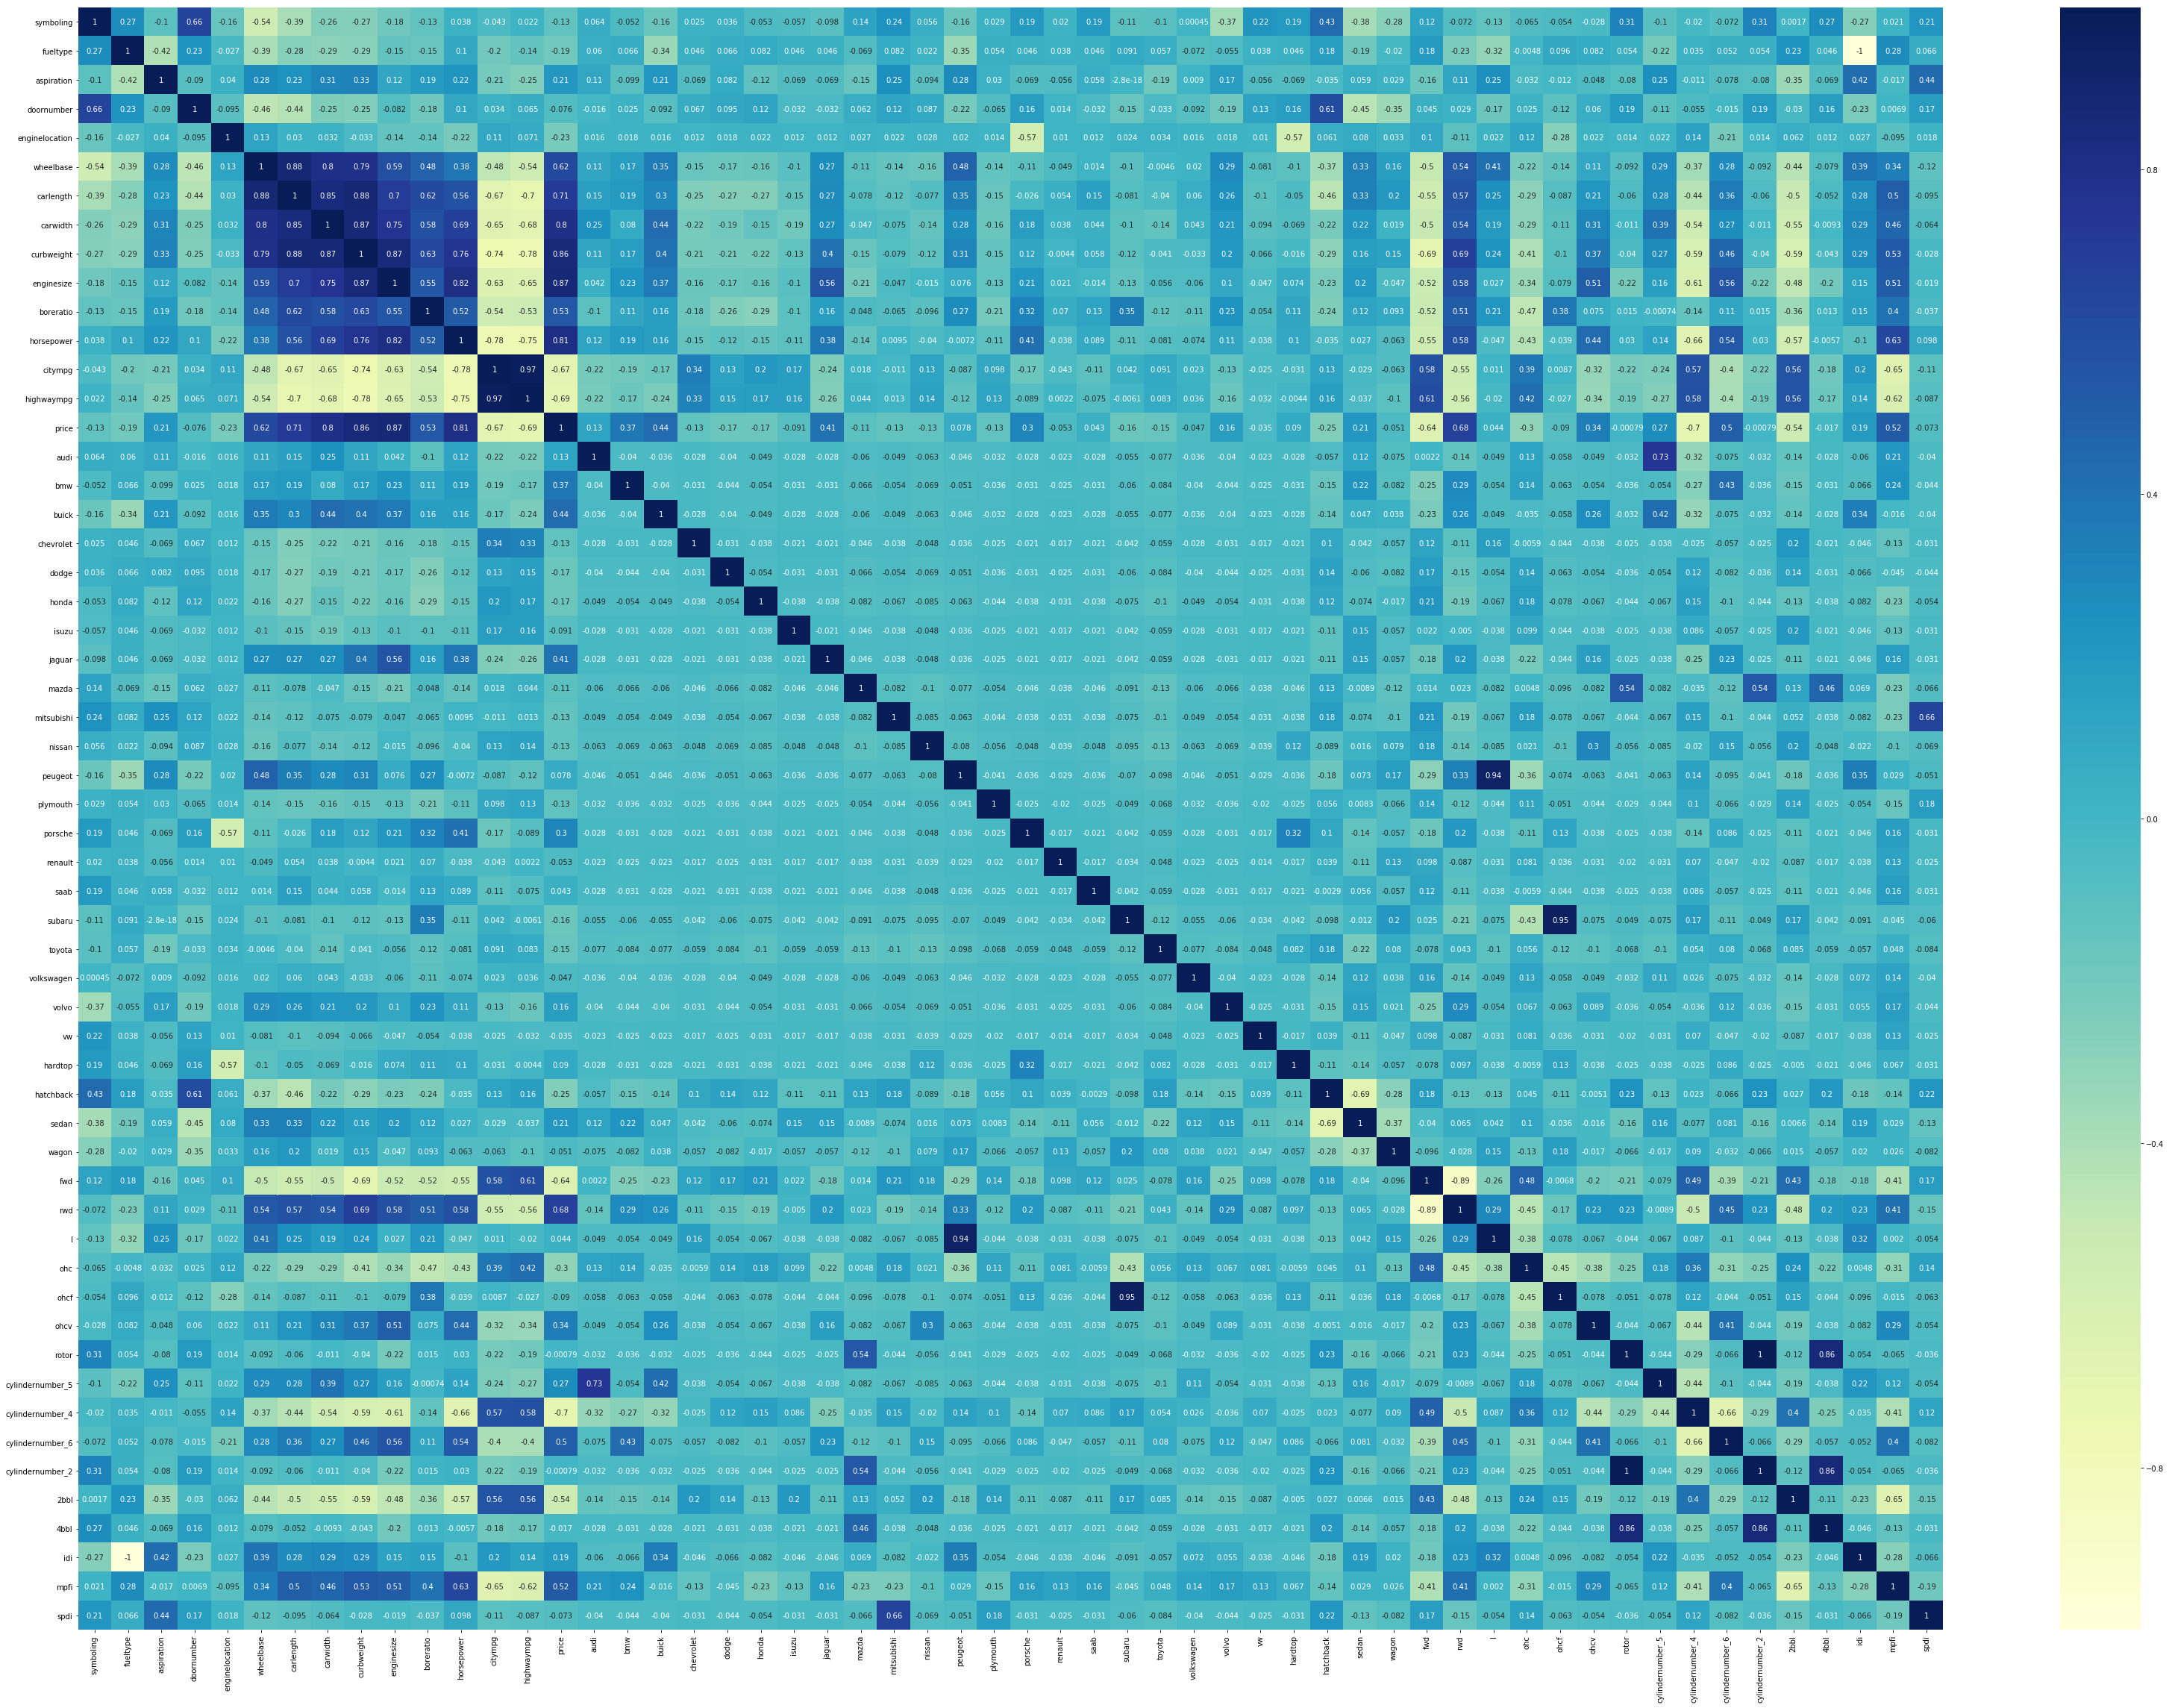

In [277]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (56, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As we can see, enginesize seems to the correlated to price the most. Below is a pairplot for enginesize vs price.

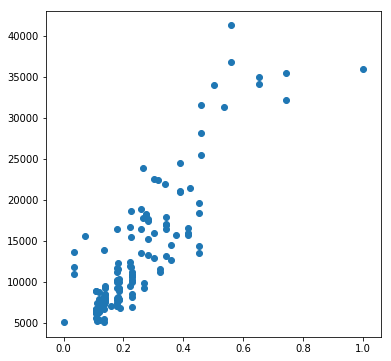

In [278]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()
#Hence we can consider enginesize as one of the most important independent variables

### Dividing into X and Y sets for the model building

In [279]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

Fitting a regression line through the training data using `statsmodels`
and explicitly adding the `constant`.

In [280]:
# Check all the columns of the dataframe

carPrice_df_final.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'vw',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'cylindernumber_5', 'cylindernumber_4',
       'cylindernumber_6', 'cylindernumber_2', '2bbl', '4bbl', 'idi', 'mpfi',
       'spdi'],
      dtype='object')

- ### As there are many independent variables, we will take all the variables first and check the output and will eliminate one by one

In [281]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                3593.174912
symboling             628.030663
fueltype             2410.741964
aspiration           1443.552560
doornumber           -101.773746
enginelocation      -7558.985563
wheelbase            5904.201054
carlength           -6163.133756
carwidth            12242.082462
curbweight          12997.826378
enginesize          27043.175885
boreratio          -10492.140478
horsepower           4042.002297
citympg             -2996.871277
highwaympg           4915.773225
audi                 2945.451838
bmw                 10756.460579
buick                3927.412789
chevrolet           -1007.662653
dodge               -1820.278756
honda               -2056.868615
isuzu                 678.802231
jaguar               -172.478669
mazda                -761.790464
mitsubishi          -3284.138998
nissan                -91.831739
peugeot            -16245.831118
plymouth            -1748.029592
porsche              6792.197941
renault             -1932.446566
saab      

In [282]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     43.96
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.69e-46
Time:                        12:35:18   Log-Likelihood:                -1250.0
No. Observations:                 143   AIC:                             2606.
Df Residuals:                      90   BIC:                             2763.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3593.1749   3807.951  

### Checking VIF

In [283]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [284]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,fueltype,inf
45,rotor,inf
52,idi,inf
4,enginelocation,inf
43,ohcf,inf
30,subaru,inf
49,cylindernumber_2,inf
47,cylindernumber_4,147.170000
9,enginesize,112.520000
41,l,58.540000


### Dropping the variable and updating the model
- We can see that the var nissan has high VIF and P value, so eliminating it we get:

In [285]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('nissan', 1,)

In [286]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [287]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     45.32
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           3.96e-47
Time:                        12:35:19   Log-Likelihood:                -1250.0
No. Observations:                 143   AIC:                             2604.
Df Residuals:                      91   BIC:                             2758.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3512.7174   3226.461  

In [288]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,enginelocation,inf
42,ohcf,inf
29,subaru,inf
44,rotor,inf
48,cylindernumber_2,inf
1,fueltype,inf
51,idi,inf
46,cylindernumber_4,106.620000
9,enginesize,91.140000
52,mpfi,54.600000


### Dropping the variable and updating the model
- - We can see that the var jaguar has high VIF and P value, so eliminating it we get::

In [289]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('jaguar', 1,)

In [290]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [291]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           5.75e-48
Time:                        12:35:22   Log-Likelihood:                -1250.0
No. Observations:                 143   AIC:                             2602.
Df Residuals:                      92   BIC:                             2753.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3558.8114   3033.820  

In [292]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,enginelocation,inf
41,ohcf,inf
28,subaru,inf
43,rotor,inf
47,cylindernumber_2,inf
50,idi,inf
1,fueltype,inf
45,cylindernumber_4,90.620000
51,mpfi,54.480000
12,citympg,52.350000


In [293]:
#We can see that the var 2bbl has high VIF and P value, so eliminating it we get:

X = X.drop('2bbl', 1,)

In [294]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [295]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     48.20
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           8.22e-49
Time:                        12:35:24   Log-Likelihood:                -1250.0
No. Observations:                 143   AIC:                             2600.
Df Residuals:                      93   BIC:                             2748.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3590.0289   2967.688  

In [296]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
47,cylindernumber_2,inf
41,ohcf,inf
28,subaru,inf
4,enginelocation,inf
43,rotor,inf
1,fueltype,inf
49,idi,inf
45,cylindernumber_4,90.360000
12,citympg,51.280000
39,l,45.810000


In [297]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('fwd', 1,)

In [298]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [299]:
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     49.73
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.16e-49
Time:                        12:35:26   Log-Likelihood:                -1250.1
No. Observations:                 143   AIC:                             2598.
Df Residuals:                      94   BIC:                             2743.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3553.4237   2932.527  

In [300]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
48,idi,inf
46,cylindernumber_2,inf
28,subaru,inf
4,enginelocation,inf
1,fueltype,inf
40,ohcf,inf
42,rotor,inf
44,cylindernumber_4,90.080000
12,citympg,50.460000
38,l,45.720000


In [301]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('doornumber', 1,)

In [302]:
# Build a sixth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [303]:
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     51.31
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.63e-50
Time:                        12:35:27   Log-Likelihood:                -1250.1
No. Observations:                 143   AIC:                             2596.
Df Residuals:                      95   BIC:                             2738.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3546.6226   2917.110  

In [304]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
45,cylindernumber_2,inf
39,ohcf,inf
3,enginelocation,inf
27,subaru,inf
41,rotor,inf
1,fueltype,inf
47,idi,inf
43,cylindernumber_4,90.080000
11,citympg,49.460000
37,l,45.710000


In [305]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('citympg', 1,)

In [306]:
# Build a seventh fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [307]:
# Print the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     52.81
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.56e-51
Time:                        12:35:29   Log-Likelihood:                -1250.3
No. Observations:                 143   AIC:                             2595.
Df Residuals:                      96   BIC:                             2734.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3341.1628   2881.009  

In [308]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
44,cylindernumber_2,inf
46,idi,inf
38,ohcf,inf
3,enginelocation,inf
26,subaru,inf
40,rotor,inf
1,fueltype,inf
42,cylindernumber_4,90.040000
36,l,45.700000
21,peugeot,38.590000


In [309]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('spdi', 1,)

In [310]:
# Build a 8th fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [311]:
# Print the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     54.44
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           3.77e-52
Time:                        12:35:30   Log-Likelihood:                -1250.4
No. Observations:                 143   AIC:                             2593.
Df Residuals:                      97   BIC:                             2729.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3401.2015   2865.606  

In [312]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
46,idi,inf
44,cylindernumber_2,inf
3,enginelocation,inf
26,subaru,inf
1,fueltype,inf
38,ohcf,inf
40,rotor,inf
42,cylindernumber_4,89.980000
36,l,45.590000
21,peugeot,38.550000


In [313]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('symboling', 1,)

In [314]:
# Build a 9th fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [315]:
# Print the summary of the model
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     56.20
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           5.19e-53
Time:                        12:35:32   Log-Likelihood:                -1250.5
No. Observations:                 143   AIC:                             2591.
Df Residuals:                      98   BIC:                             2724.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3589.6026   2776.795  

In [316]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,fueltype,inf
45,idi,inf
25,subaru,inf
37,ohcf,inf
39,rotor,inf
43,cylindernumber_2,inf
2,enginelocation,inf
41,cylindernumber_4,89.900000
35,l,45.450000
20,peugeot,38.410000


In [317]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('idi', 1,)

In [318]:
# Build a 10th fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [319]:
# Print the summary of the model
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     56.20
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           5.19e-53
Time:                        12:35:33   Log-Likelihood:                -1250.5
No. Observations:                 143   AIC:                             2591.
Df Residuals:                      98   BIC:                             2724.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4386.7172   3963.878  

In [320]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
43,cylindernumber_2,inf
39,rotor,inf
2,enginelocation,715.600000
25,subaru,142.190000
37,ohcf,120.640000
41,cylindernumber_4,89.900000
35,l,45.450000
20,peugeot,38.410000
7,enginesize,34.690000
32,sedan,32.100000


In [321]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('cylindernumber_6', 1,)

In [322]:
# Build a 11th fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [323]:
# Print the summary of the model
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     57.83
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           8.33e-54
Time:                        12:35:34   Log-Likelihood:                -1250.8
No. Observations:                 143   AIC:                             2590.
Df Residuals:                      99   BIC:                             2720.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6229.5097   2770.308  

In [324]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
42,cylindernumber_2,inf
39,rotor,inf
2,enginelocation,409.400000
25,subaru,73.620000
37,ohcf,62.650000
32,sedan,31.410000
6,curbweight,30.320000
7,enginesize,28.210000
31,hatchback,26.540000
20,peugeot,25.520000


In [325]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('cylindernumber_5', 1,)

In [326]:
# Build a 12th fitted model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [327]:
# Print the summary of the model
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     59.61
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.25e-54
Time:                        12:35:36   Log-Likelihood:                -1251.0
No. Observations:                 143   AIC:                             2588.
Df Residuals:                     100   BIC:                             2715.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6674.9907   2649.035  

In [328]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
41,cylindernumber_2,inf
39,rotor,inf
2,enginelocation,373.880000
25,subaru,69.560000
37,ohcf,58.350000
32,sedan,31.200000
6,curbweight,30.320000
31,hatchback,26.440000
7,enginesize,24.500000
20,peugeot,24.370000


In [329]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('horsepower', 1,)

In [330]:
# Build a 13th fitted model
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

In [331]:
# Print the summary of the model
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     61.40
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.95e-55
Time:                        12:35:37   Log-Likelihood:                -1251.3
No. Observations:                 143   AIC:                             2587.
Df Residuals:                     101   BIC:                             2711.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6635.3482   2640.760  

In [332]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
40,cylindernumber_2,inf
38,rotor,inf
2,enginelocation,373.880000
24,subaru,69.490000
36,ohcf,57.820000
6,curbweight,30.290000
31,sedan,27.860000
19,peugeot,24.360000
4,carlength,24.140000
30,hatchback,23.310000


In [333]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('highwaympg', 1,)

In [334]:
# Build a 14th fitted model
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

In [335]:
# Print the summary of the model
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     63.25
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           3.07e-56
Time:                        12:35:39   Log-Likelihood:                -1251.7
No. Observations:                 143   AIC:                             2585.
Df Residuals:                     102   BIC:                             2707.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7801.4108   2017.510  

In [336]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
37,rotor,inf
39,cylindernumber_2,inf
2,enginelocation,170.760000
23,subaru,48.760000
35,ohcf,41.500000
6,curbweight,28.320000
30,sedan,25.200000
18,peugeot,23.300000
4,carlength,22.510000
29,hatchback,21.490000


In [337]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('ohc', 1,)

In [338]:
# Build a 15th fitted model
X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()

In [339]:
# Print the summary of the model
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     64.59
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           7.50e-57
Time:                        12:35:40   Log-Likelihood:                -1252.6
No. Observations:                 143   AIC:                             2585.
Df Residuals:                     103   BIC:                             2704.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7662.5199   2017.992  

In [340]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
38,cylindernumber_2,inf
36,rotor,inf
2,enginelocation,169.920000
23,subaru,47.260000
34,ohcf,41.080000
6,curbweight,28.250000
18,peugeot,23.300000
4,carlength,22.450000
30,sedan,21.470000
7,enginesize,19.040000


In [341]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('wheelbase', 1,)

In [342]:
# Build a 16th fitted model
X_train_lm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm).fit()

In [343]:
# Print the summary of the model
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     65.36
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.92e-57
Time:                        12:35:42   Log-Likelihood:                -1254.3
No. Observations:                 143   AIC:                             2587.
Df Residuals:                     104   BIC:                             2702.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6890.9009   1967.774  

In [344]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
37,cylindernumber_2,inf
35,rotor,inf
2,enginelocation,160.860000
22,subaru,45.110000
33,ohcf,39.090000
5,curbweight,27.870000
17,peugeot,22.340000
6,enginesize,19.040000
3,carlength,18.940000
32,l,17.390000


In [345]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('carlength', 1,)

In [346]:
# Build a 17th fitted model
X_train_lm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_lm).fit()

In [347]:
# Print the summary of the model
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     66.32
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.03e-57
Time:                        12:35:44   Log-Likelihood:                -1255.8
No. Observations:                 143   AIC:                             2588.
Df Residuals:                     105   BIC:                             2700.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6120.8159   1907.828  

In [348]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
34,rotor,inf
36,cylindernumber_2,inf
2,enginelocation,160.830000
21,subaru,40.190000
32,ohcf,36.250000
4,curbweight,22.530000
16,peugeot,22.330000
5,enginesize,17.800000
31,l,17.350000
28,sedan,14.430000


In [349]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('rwd', 1,)

In [350]:
# Build a 18th fitted model
X_train_lm = sm.add_constant(X)

lr_18 = sm.OLS(y_train, X_train_lm).fit()

In [351]:
# Print the summary of the model
print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     67.05
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           4.49e-58
Time:                        12:35:45   Log-Likelihood:                -1257.5
No. Observations:                 143   AIC:                             2589.
Df Residuals:                     106   BIC:                             2699.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6502.5284   1907.929  

In [352]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
33,rotor,inf
35,cylindernumber_2,inf
2,enginelocation,149.580000
21,subaru,39.940000
31,ohcf,36.180000
4,curbweight,21.470000
16,peugeot,21.240000
5,enginesize,17.760000
30,l,17.230000
28,sedan,13.850000


In [353]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('chevrolet', 1,)

In [354]:
# Build a 19th fitted model
X_train_lm = sm.add_constant(X)

lr_19 = sm.OLS(y_train, X_train_lm).fit()

In [355]:
# Print the summary of the model
print(lr_19.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     69.60
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           5.40e-59
Time:                        12:35:47   Log-Likelihood:                -1257.5
No. Observations:                 143   AIC:                             2587.
Df Residuals:                     107   BIC:                             2694.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6475.8893   1891.780  

In [356]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
34,cylindernumber_2,inf
32,rotor,inf
2,enginelocation,149.070000
20,subaru,39.550000
30,ohcf,36.020000
4,curbweight,21.460000
5,enginesize,17.760000
15,peugeot,17.570000
27,sedan,13.790000
29,l,13.670000


In [357]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('mpfi', 1,)

In [358]:
# Build a 20th fitted model
X_train_lm = sm.add_constant(X)

lr_20 = sm.OLS(y_train, X_train_lm).fit()

In [359]:
# Print the summary of the model
print(lr_20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     72.29
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           6.40e-60
Time:                        12:35:49   Log-Likelihood:                -1257.6
No. Observations:                 143   AIC:                             2585.
Df Residuals:                     108   BIC:                             2689.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6497.7727   1879.867  

In [360]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
34,cylindernumber_2,inf
32,rotor,inf
2,enginelocation,146.780000
20,subaru,39.520000
30,ohcf,35.960000
4,curbweight,20.650000
5,enginesize,17.660000
15,peugeot,17.570000
29,l,13.670000
27,sedan,13.090000


In [361]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('vw', 1,)

In [362]:
# Build a 21st fitted model
X_train_lm = sm.add_constant(X)

lr_21 = sm.OLS(y_train, X_train_lm).fit()

In [363]:
# Print the summary of the model
print(lr_21.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     75.12
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           7.59e-61
Time:                        12:35:52   Log-Likelihood:                -1257.6
No. Observations:                 143   AIC:                             2583.
Df Residuals:                     109   BIC:                             2684.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6389.8637   1831.243  

In [364]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
33,cylindernumber_2,inf
31,rotor,inf
2,enginelocation,140.270000
20,subaru,38.240000
29,ohcf,34.930000
4,curbweight,20.600000
5,enginesize,17.620000
15,peugeot,17.570000
28,l,13.640000
26,sedan,11.990000


In [365]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('fueltype', 1,)

In [366]:
# Build a 22nd fitted model
X_train_lm = sm.add_constant(X)

lr_22 = sm.OLS(y_train, X_train_lm).fit()

In [367]:
# Print the summary of the model
print(lr_22.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     77.73
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.14e-61
Time:                        12:35:53   Log-Likelihood:                -1258.0
No. Observations:                 143   AIC:                             2582.
Df Residuals:                     110   BIC:                             2680.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6796.7941   1750.896  

In [368]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
32,cylindernumber_2,inf
30,rotor,inf
1,enginelocation,120.330000
19,subaru,36.700000
28,ohcf,33.000000
3,curbweight,20.570000
4,enginesize,17.620000
14,peugeot,17.350000
27,l,13.620000
25,sedan,11.790000


In [369]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('4bbl', 1,)

In [370]:
# Build a 23rd fitted model
X_train_lm = sm.add_constant(X)

lr_23 = sm.OLS(y_train, X_train_lm).fit()

In [371]:
# Print the summary of the model
print(lr_23.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     80.34
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.90e-62
Time:                        12:35:54   Log-Likelihood:                -1258.6
No. Observations:                 143   AIC:                             2581.
Df Residuals:                     111   BIC:                             2676.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6748.6907   1748.737  

In [372]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
32,cylindernumber_2,inf
30,rotor,inf
1,enginelocation,120.260000
19,subaru,36.660000
28,ohcf,32.980000
3,curbweight,20.560000
4,enginesize,17.600000
14,peugeot,17.350000
27,l,13.610000
25,sedan,11.790000


In [373]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('audi', 1,)

In [374]:
# Build a 24th fitted model
X_train_lm = sm.add_constant(X)

lr_24 = sm.OLS(y_train, X_train_lm).fit()

In [375]:
# Print the summary of the model
print(lr_24.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     82.63
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           4.21e-63
Time:                        12:35:56   Log-Likelihood:                -1259.5
No. Observations:                 143   AIC:                             2581.
Df Residuals:                     112   BIC:                             2673.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7453.7089   1651.288  

In [376]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
31,cylindernumber_2,inf
29,rotor,inf
1,enginelocation,112.840000
18,subaru,32.770000
27,ohcf,30.450000
3,curbweight,20.540000
13,peugeot,17.350000
4,enginesize,14.560000
26,l,13.230000
24,sedan,11.760000


In [377]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('isuzu', 1,)

In [378]:
# Build a 25th fitted model
X_train_lm = sm.add_constant(X)

lr_25 = sm.OLS(y_train, X_train_lm).fit()

In [379]:
# Print the summary of the model
print(lr_25.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     84.98
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           9.88e-64
Time:                        12:35:58   Log-Likelihood:                -1260.5
No. Observations:                 143   AIC:                             2581.
Df Residuals:                     113   BIC:                             2670.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7528.5154   1654.552  

In [380]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
30,cylindernumber_2,inf
28,rotor,inf
1,enginelocation,112.310000
17,subaru,32.720000
26,ohcf,30.450000
3,curbweight,20.480000
12,peugeot,17.290000
4,enginesize,14.560000
25,l,13.100000
22,hatchback,11.420000


In [381]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('saab', 1,)

In [382]:
# Build a 26th fitted model
X_train_lm = sm.add_constant(X)

lr_26 = sm.OLS(y_train, X_train_lm).fit()

In [383]:
# Print the summary of the model
print(lr_26.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     87.44
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.37e-64
Time:                        12:36:01   Log-Likelihood:                -1261.5
No. Observations:                 143   AIC:                             2581.
Df Residuals:                     114   BIC:                             2667.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7586.5432   1658.798  

In [384]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,cylindernumber_2,inf
27,rotor,inf
1,enginelocation,105.900000
16,subaru,32.100000
25,ohcf,30.380000
3,curbweight,19.240000
12,peugeot,16.470000
4,enginesize,13.140000
24,l,13.050000
22,sedan,11.210000


In [385]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('volvo', 1,)

In [386]:
# Build a 27th fitted model
X_train_lm = sm.add_constant(X)

lr_27 = sm.OLS(y_train, X_train_lm).fit()

In [387]:
# Print the summary of the model
print(lr_27.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     90.27
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           5.05e-65
Time:                        12:36:03   Log-Likelihood:                -1262.4
No. Observations:                 143   AIC:                             2581.
Df Residuals:                     115   BIC:                             2664.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7689.9548   1659.888  

In [388]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,cylindernumber_2,inf
26,rotor,inf
1,enginelocation,102.410000
16,subaru,31.390000
24,ohcf,30.290000
3,curbweight,19.050000
12,peugeot,15.740000
23,l,13.000000
4,enginesize,12.120000
21,sedan,11.150000


In [389]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('plymouth', 1,)

In [390]:
# Build a 28th fitted model
X_train_lm = sm.add_constant(X)

lr_28 = sm.OLS(y_train, X_train_lm).fit()

In [391]:
# Print the summary of the model
print(lr_28.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     91.43
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           3.23e-65
Time:                        12:36:04   Log-Likelihood:                -1264.7
No. Observations:                 143   AIC:                             2583.
Df Residuals:                     116   BIC:                             2663.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7662.3779   1679.336  

In [392]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
27,cylindernumber_2,inf
25,rotor,inf
1,enginelocation,102.410000
15,subaru,31.390000
23,ohcf,30.280000
3,curbweight,18.980000
12,peugeot,15.740000
22,l,12.990000
4,enginesize,12.030000
20,sedan,11.060000


In [393]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('dodge', 1,)

In [394]:
# Build a 29th fitted model
X_train_lm = sm.add_constant(X)

lr_29 = sm.OLS(y_train, X_train_lm).fit()

In [395]:
# Print the summary of the model
print(lr_29.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     93.85
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.08e-65
Time:                        12:36:07   Log-Likelihood:                -1266.2
No. Observations:                 143   AIC:                             2584.
Df Residuals:                     117   BIC:                             2661.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7580.9342   1688.692  

In [396]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,cylindernumber_2,inf
24,rotor,inf
1,enginelocation,102.340000
14,subaru,31.370000
22,ohcf,30.260000
3,curbweight,18.950000
11,peugeot,15.730000
21,l,12.970000
4,enginesize,11.830000
19,sedan,11.020000


In [397]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('mazda', 1,)

In [398]:
# Build a 30th fitted model
X_train_lm = sm.add_constant(X)

lr_30 = sm.OLS(y_train, X_train_lm).fit()

In [399]:
# Print the summary of the model
print(lr_30.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     95.70
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           5.64e-66
Time:                        12:36:09   Log-Likelihood:                -1268.2
No. Observations:                 143   AIC:                             2586.
Df Residuals:                     118   BIC:                             2661.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7473.0491   1704.543  

In [400]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,cylindernumber_2,inf
23,rotor,inf
1,enginelocation,100.960000
13,subaru,31.120000
21,ohcf,30.190000
3,curbweight,18.760000
10,peugeot,15.620000
20,l,12.960000
4,enginesize,11.800000
18,sedan,10.940000


In [401]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('volkswagen', 1,)

In [402]:
# Build a 31st fitted model
X_train_lm = sm.add_constant(X)

lr_31 = sm.OLS(y_train, X_train_lm).fit()

In [403]:
# Print the summary of the model
print(lr_31.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     97.36
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           3.68e-66
Time:                        12:36:11   Log-Likelihood:                -1270.5
No. Observations:                 143   AIC:                             2589.
Df Residuals:                     119   BIC:                             2660.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7383.9458   1724.228  

In [404]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,cylindernumber_2,inf
22,rotor,inf
1,enginelocation,100.810000
13,subaru,31.070000
20,ohcf,30.140000
3,curbweight,18.760000
10,peugeot,15.450000
19,l,12.910000
4,enginesize,11.790000
17,sedan,10.930000


In [405]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('honda', 1,)

In [406]:
# Build a 32nd fitted model
X_train_lm = sm.add_constant(X)

lr_32 = sm.OLS(y_train, X_train_lm).fit()

In [407]:
# Print the summary of the model
print(lr_32.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     101.4
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           7.22e-67
Time:                        12:36:14   Log-Likelihood:                -1271.4
No. Observations:                 143   AIC:                             2589.
Df Residuals:                     120   BIC:                             2657.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7399.1552   1727.122  

In [408]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,cylindernumber_2,inf
21,rotor,inf
1,enginelocation,100.360000
12,subaru,31.070000
19,ohcf,30.130000
3,curbweight,18.760000
9,peugeot,15.410000
18,l,12.890000
4,enginesize,11.630000
16,sedan,10.920000


In [409]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('ohcv', 1,)

In [410]:
# Build a 33rd fitted model
X_train_lm = sm.add_constant(X)

lr_33 = sm.OLS(y_train, X_train_lm).fit()

In [411]:
# Print the summary of the model
print(lr_33.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     104.0
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           3.54e-67
Time:                        12:36:17   Log-Likelihood:                -1273.3
No. Observations:                 143   AIC:                             2591.
Df Residuals:                     121   BIC:                             2656.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7330.5979   1743.209  

In [412]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,cylindernumber_2,inf
20,rotor,inf
1,enginelocation,98.410000
12,subaru,31.070000
19,ohcf,30.130000
3,curbweight,18.580000
9,peugeot,15.250000
18,l,12.790000
16,sedan,10.890000
15,hatchback,10.650000


In [413]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('toyota', 1,)

In [414]:
# Build a 34th fitted model
X_train_lm = sm.add_constant(X)

lr_34 = sm.OLS(y_train, X_train_lm).fit()

In [415]:
# Print the summary of the model
print(lr_34.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     107.1
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.67e-67
Time:                        12:36:19   Log-Likelihood:                -1275.2
No. Observations:                 143   AIC:                             2592.
Df Residuals:                     122   BIC:                             2655.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7417.6729   1758.670  

In [416]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,cylindernumber_2,inf
19,rotor,inf
1,enginelocation,98.310000
12,subaru,31.070000
18,ohcf,30.070000
3,curbweight,17.390000
9,peugeot,15.250000
17,l,12.700000
15,sedan,10.760000
14,hatchback,10.180000


In [417]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('cylindernumber_2', 1,)

In [418]:
# Build a 35th fitted model
X_train_lm = sm.add_constant(X)

lr_35 = sm.OLS(y_train, X_train_lm).fit()

In [419]:
# Print the summary of the model
print(lr_35.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     107.1
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.67e-67
Time:                        12:36:22   Log-Likelihood:                -1275.2
No. Observations:                 143   AIC:                             2592.
Df Residuals:                     122   BIC:                             2655.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7417.6729   1758.670  

In [420]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginelocation,98.31
12,subaru,31.07
18,ohcf,30.07
3,curbweight,17.39
9,peugeot,15.25
17,l,12.70
15,sedan,10.76
14,hatchback,10.18
4,enginesize,9.89
2,carwidth,6.45


In [421]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('enginelocation', 1,)

In [422]:
# Build a 36th fitted model
X_train_lm = sm.add_constant(X)

lr_36 = sm.OLS(y_train, X_train_lm).fit()

In [423]:
# Print the summary of the model
print(lr_36.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     107.1
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.67e-67
Time:                        12:36:27   Log-Likelihood:                -1275.2
No. Observations:                 143   AIC:                             2592.
Df Residuals:                     122   BIC:                             2655.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1277.6952   1626.918  

In [424]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,78.88
1,carwidth,43.92
4,boreratio,34.84
3,enginesize,33.17
11,subaru,27.54
17,ohcf,26.91
14,sedan,12.69
8,peugeot,12.53
19,cylindernumber_4,12.23
16,l,11.26


In [425]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('curbweight', 1,)

In [426]:
# Build a 37th fitted model
X_train_lm = sm.add_constant(X)

lr_37 = sm.OLS(y_train, X_train_lm).fit()

In [427]:
# Print the summary of the model
print(lr_37.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     98.47
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           5.85e-65
Time:                        12:36:30   Log-Likelihood:                -1284.9
No. Observations:                 143   AIC:                             2610.
Df Residuals:                     123   BIC:                             2669.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2735.5408   1693.699  

In [428]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,34.24
3,boreratio,30.28
10,subaru,27.33
16,ohcf,26.91
2,enginesize,19.41
13,sedan,12.66
7,peugeot,12.21
18,cylindernumber_4,11.54
15,l,11.20
12,hatchback,8.84


In [429]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('cylindernumber_4', 1,)

In [430]:
# Build a 38th fitted model
X_train_lm = sm.add_constant(X)

lr_38 = sm.OLS(y_train, X_train_lm).fit()

In [431]:
# Print the summary of the model
print(lr_38.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     104.0
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           8.82e-66
Time:                        12:36:33   Log-Likelihood:                -1285.4
No. Observations:                 143   AIC:                             2609.
Df Residuals:                     124   BIC:                             2665.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3821.9663   1249.422      3.059      0.0

In [432]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,32.40
10,subaru,27.32
16,ohcf,26.77
3,boreratio,18.35
2,enginesize,13.52
7,peugeot,10.65
15,l,9.75
13,sedan,7.11
12,hatchback,4.31
14,wagon,2.58


In [433]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('boreratio', 1,)

In [434]:
# Build a 39th fitted model
X_train_lm = sm.add_constant(X)

lr_39 = sm.OLS(y_train, X_train_lm).fit()

In [435]:
# Print the summary of the model
print(lr_39.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     109.8
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.55e-66
Time:                        12:36:35   Log-Likelihood:                -1286.2
No. Observations:                 143   AIC:                             2608.
Df Residuals:                     125   BIC:                             2662.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3315.3269   1167.114      2.841      0.0

In [436]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,30.40
15,ohcf,26.51
9,subaru,25.67
2,enginesize,12.05
6,peugeot,10.61
14,l,9.73
12,sedan,6.43
11,hatchback,3.99
13,wagon,2.40
7,porsche,1.81


In [437]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('carwidth', 1,)

In [438]:
# Build a 40th fitted model
X_train_lm = sm.add_constant(X)

lr_40 = sm.OLS(y_train, X_train_lm).fit()

In [439]:
# Print the summary of the model
print(lr_40.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     78.42
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.94e-57
Time:                        12:36:37   Log-Likelihood:                -1312.9
No. Observations:                 143   AIC:                             2660.
Df Residuals:                     126   BIC:                             2710.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5347.7710   1363.540      3.922      0.0

In [440]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,ohcf,24.34
8,subaru,23.65
5,peugeot,9.74
13,l,9.39
1,enginesize,4.65
11,sedan,2.92
10,hatchback,2.14
6,porsche,1.65
0,aspiration,1.59
9,hardtop,1.56


In [441]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('l', 1,)

In [442]:
# Build a 41st fitted model
X_train_lm = sm.add_constant(X)

lr_41 = sm.OLS(y_train, X_train_lm).fit()

In [443]:
# Print the summary of the model
print(lr_41.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     83.23
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           4.34e-58
Time:                        12:36:39   Log-Likelihood:                -1313.7
No. Observations:                 143   AIC:                             2659.
Df Residuals:                     127   BIC:                             2707.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5415.5374   1365.018      3.967      0.0

In [444]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,ohcf,24.33
8,subaru,23.63
1,enginesize,4.58
11,sedan,2.89
10,hatchback,2.05
6,porsche,1.65
0,aspiration,1.58
9,hardtop,1.56
12,wagon,1.54
3,buick,1.36


In [445]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('ohcf', 1,)

In [446]:
# Build a 42nd fitted model
X_train_lm = sm.add_constant(X)

lr_42 = sm.OLS(y_train, X_train_lm).fit()

In [447]:
# Print the summary of the model
print(lr_42.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     87.89
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.63e-58
Time:                        12:36:42   Log-Likelihood:                -1315.2
No. Observations:                 143   AIC:                             2660.
Df Residuals:                     128   BIC:                             2705.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5408.2198   1373.564      3.937      0.0

In [448]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,4.58
11,sedan,2.89
10,hatchback,2.03
0,aspiration,1.58
12,wagon,1.54
3,buick,1.36
5,peugeot,1.29
6,porsche,1.25
4,mitsubishi,1.23
2,bmw,1.19


In [449]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('peugeot', 1,)

In [450]:
# Build a 43rd fitted model
X_train_lm = sm.add_constant(X)

lr_43 = sm.OLS(y_train, X_train_lm).fit()

In [451]:
# Print the summary of the model
print(lr_43.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     95.07
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.98e-59
Time:                        12:36:44   Log-Likelihood:                -1315.4
No. Observations:                 143   AIC:                             2659.
Df Residuals:                     129   BIC:                             2700.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5400.4976   1370.247      3.941      0.0

In [452]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,4.54
10,sedan,2.88
9,hatchback,2.02
11,wagon,1.49
0,aspiration,1.43
3,buick,1.32
5,porsche,1.25
4,mitsubishi,1.21
8,hardtop,1.19
2,bmw,1.18


In [453]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('hardtop', 1,)

In [454]:
# Build a 44th fitted model
X_train_lm = sm.add_constant(X)

lr_44 = sm.OLS(y_train, X_train_lm).fit()

In [455]:
# Print the summary of the model
print(lr_44.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     102.3
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           4.33e-60
Time:                        12:36:46   Log-Likelihood:                -1316.3
No. Observations:                 143   AIC:                             2659.
Df Residuals:                     130   BIC:                             2697.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4312.5954   1081.664      3.987      0.0

In [456]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,4.30
9,sedan,2.79
8,hatchback,1.94
10,wagon,1.48
0,aspiration,1.43
3,buick,1.31
4,mitsubishi,1.21
2,bmw,1.18
5,porsche,1.16
7,subaru,1.16


In [457]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('wagon', 1,)

In [458]:
# Build a 45th fitted model
X_train_lm = sm.add_constant(X)

lr_45 = sm.OLS(y_train, X_train_lm).fit()

In [459]:
# Print the summary of the model
print(lr_45.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     111.8
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           5.74e-61
Time:                        12:36:48   Log-Likelihood:                -1316.7
No. Observations:                 143   AIC:                             2657.
Df Residuals:                     131   BIC:                             2693.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3571.8202    649.698      5.498      0.0

In [460]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,3.43
9,sedan,2.33
8,hatchback,1.75
0,aspiration,1.41
3,buick,1.29
4,mitsubishi,1.21
2,bmw,1.17
5,porsche,1.14
10,rotor,1.13
7,subaru,1.06


In [461]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('sedan', 1,)

In [462]:
# Build a 46th fitted model
X_train_lm = sm.add_constant(X)

lr_46 = sm.OLS(y_train, X_train_lm).fit()

In [463]:
# Print the summary of the model
print(lr_46.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     123.6
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           5.73e-62
Time:                        12:36:51   Log-Likelihood:                -1316.9
No. Observations:                 143   AIC:                             2656.
Df Residuals:                     132   BIC:                             2688.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3358.4969    500.839      6.706      0.0

In [464]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,1.93
8,hatchback,1.46
0,aspiration,1.39
3,buick,1.24
4,mitsubishi,1.21
2,bmw,1.17
9,rotor,1.11
5,porsche,1.10
7,subaru,1.05
6,renault,1.03


In [465]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('renault', 1,)

In [466]:
# Build a 47th fitted model
X_train_lm = sm.add_constant(X)

lr_47 = sm.OLS(y_train, X_train_lm).fit()

In [467]:
# Print the summary of the model
print(lr_47.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     135.3
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.81e-62
Time:                        12:36:54   Log-Likelihood:                -1318.3
No. Observations:                 143   AIC:                             2657.
Df Residuals:                     133   BIC:                             2686.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3337.6679    503.886      6.624      0.0

In [468]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,1.90
7,hatchback,1.46
0,aspiration,1.38
3,buick,1.24
4,mitsubishi,1.20
2,bmw,1.16
8,rotor,1.11
5,porsche,1.10
6,subaru,1.05


In [469]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('subaru', 1,)

In [470]:
# Build a 48th fitted model
X_train_lm = sm.add_constant(X)

lr_48 = sm.OLS(y_train, X_train_lm).fit()

In [471]:
# Print the summary of the model
print(lr_48.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     149.5
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           6.55e-63
Time:                        12:36:56   Log-Likelihood:                -1320.0
No. Observations:                 143   AIC:                             2658.
Df Residuals:                     134   BIC:                             2685.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3093.6110    488.190      6.337      0.0

In [472]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,1.86
6,hatchback,1.46
0,aspiration,1.38
3,buick,1.23
4,mitsubishi,1.20
2,bmw,1.16
7,rotor,1.11
5,porsche,1.09


## Step 7: Residual Analysis of the train data
Checking if the error terms are also normally distributed or not

In [473]:
y_train_price = lr_48.predict(X_train_lm)

Text(0.5,0,'Errors')

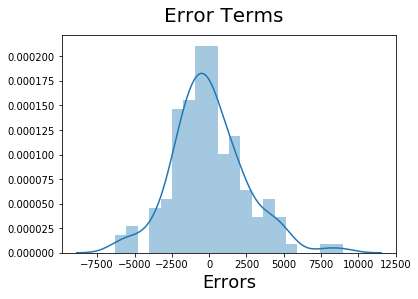

In [474]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [475]:
# Applying scaler() to all the columns except the '2 levelled ones' and 'dummy' variables
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [476]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,...,rotor,cylindernumber_5,cylindernumber_4,cylindernumber_6,cylindernumber_2,2bbl,4bbl,idi,mpfi,spdi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.000000
mean,0.583871,0.887097,0.177419,0.435484,0.967742,0.437764,0.559481,0.480376,0.428470,0.265673,...,0.0,0.032258,0.854839,0.080645,0.0,0.258065,0.0,0.112903,0.500000,0.048387
std,0.271724,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.179488,0.162820,...,0.0,0.178127,0.355139,0.274512,0.0,0.441142,0.0,0.319058,0.504082,0.216335
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.128394,0.067925,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.400000,1.000000,0.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.305275,0.177358,...,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.600000,1.000000,0.000000,0.000000,1.000000,0.387931,0.547967,0.441667,0.406129,0.226415,...,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.500000,0.000000
75%,0.800000,1.000000,0.000000,1.000000,1.000000,0.570690,0.719919,0.516667,0.564876,0.316038,...,0.0,0.000000,1.000000,0.000000,0.0,0.750000,0.0,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,0.935609,0.932075,...,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [477]:
y_test = df_test.pop('price')
X_test = df_test

In [478]:
# Adding constant variable to test dataframe
X_test_m48 = sm.add_constant(X_test)

In [479]:
# Creating X_test_m48 dataframe by dropping variables from X_test_m48

X_test_m48 = X_test_m48.drop(['symboling', 'fueltype', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'audi',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'nissan', 'peugeot', 'plymouth',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'vw',
       'hardtop', 'sedan', 'wagon', 'fwd', 'rwd', 'l', 'ohc',
       'ohcf', 'ohcv', 'cylindernumber_5', 'cylindernumber_4',
       'cylindernumber_6', 'cylindernumber_2', '2bbl', '4bbl', 'idi', 'mpfi',
       'spdi'], axis = 1)

In [480]:
# Making predictions using the forty eight model

y_pred_m48 = lr_48.predict(X_test_m48)

## Step 9: Model Evaluation

Plotting the graph for actual versus predicted values.

Text(0,0.5,'y_pred')

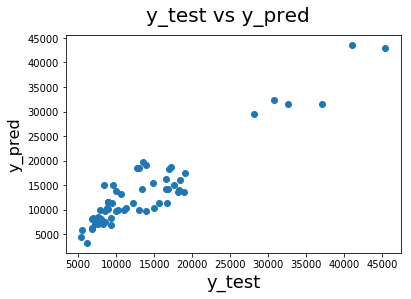

In [481]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m48)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

We can conclude that the equation of our best fitted line is:

$ price = 3.691e+04  \times  enginesize + 9903.9594  \times  porsche + 9514.0427 \times rotor + 8650.2775 \times bmw + 6008.1412 \times buick + 3324.5295 \times aspiration -1189.2168 \times hatchback -2992.8249 \times mitsubishi + 3093.6110 $

## The Results:
- F-statistic Value : 149.5
- R-squared: 0.899
- Adj. R-squared: 0.893
- P|t|< 0.05 for all the variables

In [482]:
#R-squared score on the test set
from sklearn.metrics import r2_score
round(r2_score(y_test, y_pred_m48),2)

0.88